In [4]:
+++import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np

In [3]:
input_layer = Input(shape=(784,))
# Encoder
encoder = Dense(128, activation='relu')(input_layer)
bottle_neck = Dense(64, activation='relu')(encoder)
# Decoder
decoder = Dense(128, activation='relu')(bottle_neck)
output_layer = Dense(784, activation='sigmoid')(decoder)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3161 - val_loss: 0.1389
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1311 - val_loss: 0.1105
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1085 - val_loss: 0.1003
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0994 - val_loss: 0.0944
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0947 - val_loss: 0.0911
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0910 - val_loss: 0.0890
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0888 - val_loss: 0.0862
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0867 - val_loss: 0.0846
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0852 - val_loss: 0.0833
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0841 - val_loss: 0.0824
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0831 - val_loss: 0.0816
E

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step


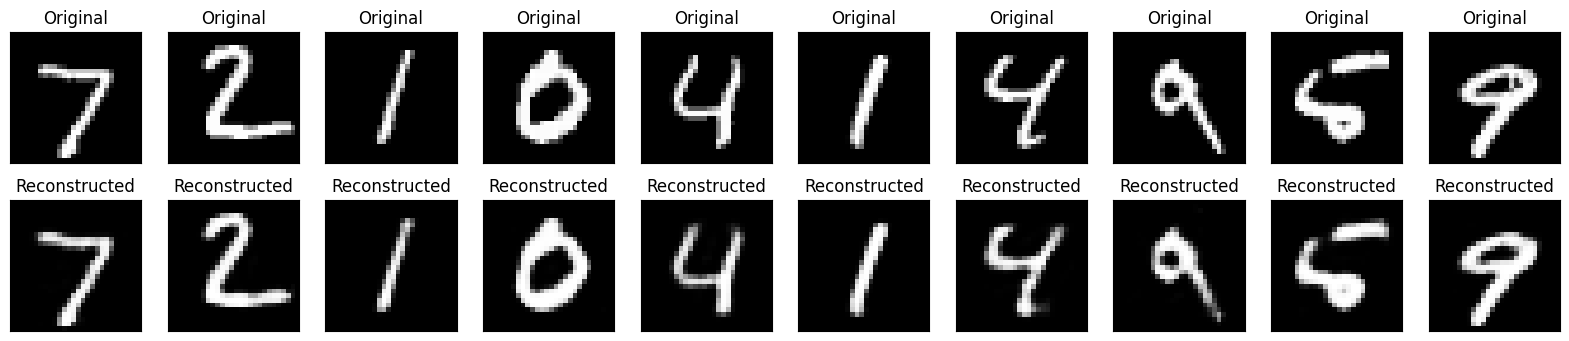

In [10]:
# Plot the reconstructed images
import matplotlib.pyplot as plt
reconstructed_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title('Original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.title('Reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [11]:
# Create a diffusion model
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
import numpy as np

In [13]:
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)
output_layer = Reshape((28, 28, 1))(x)

diff_model = Model(input_layer, output_layer)
diff_model.compile(optimizer='adam', loss='binary_crossentropy')

diff_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,542,608 (24.96 MB)

 Trainable params: 6,542,608 (24.96 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [16]:
# Train
diff_model.fit(x_train_noisy, 
               x_train, 
               epochs=10, 
               batch_size=128, 
               shuffle=True, 
               validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - loss: 0.1070 - val_loss: 0.1036
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - loss: 0.1024 - val_loss: 0.1013
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - loss: 0.0991 - val_loss: 0.1001
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - loss: 0.0967 - val_loss: 0.0998
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - loss: 0.0948 - val_loss: 0.0999
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - loss: 0.0927 - val_loss: 0.0999
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - loss: 0.0905 - val_loss: 0.1012
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - loss: 0.0891 - val_loss: 0.1018
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - loss: 0.0873 - val_loss: 0.1032
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - loss: 0.0858 - val_loss: 0.1042


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


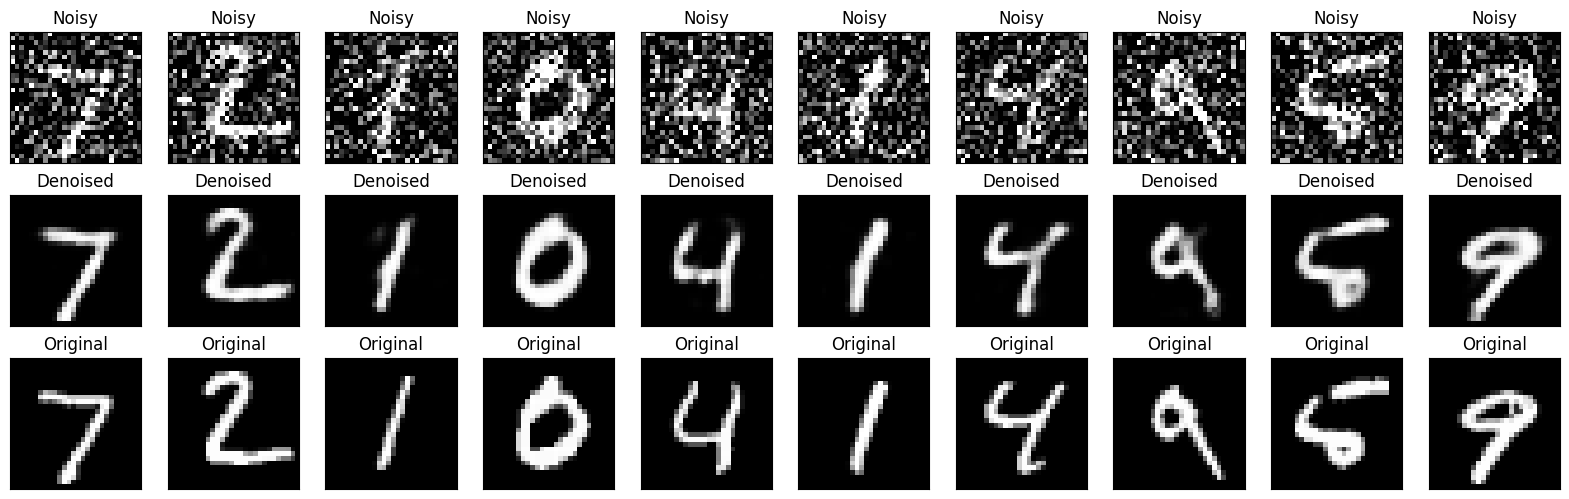

In [17]:
import matplotlib.pyplot as plt

denoised_imgs = diff_model.predict(x_test_noisy)

# Visulization
n = 10

plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1) 
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title('Noisy')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
    plt.title('Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title('Original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()